## LASSO Models w. Cross Validation - Chimera Example

## Preamble
Load Modules

In [1]:
# Import module (or part of it) with an alias

#basic tools
import pandas as pd
import numpy as np
import statsmodels.api as sm #for statistical analysis

#prediction models we'll be using
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.feature_selection import SelectFromModel

# criss validation - train/test 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score

#functions for plotting
import matplotlib.pyplot as plt

#hide warnings (lasso & logit can give you many lines of convergence warning during each iteration)
import warnings
warnings.filterwarnings('ignore')

print ( "Module Import Completed!")

Module Import Completed!


## Load and Check Data

In [2]:
# load the data, note that we're using a cleaned version for this class
url="https://www.dropbox.com/s/r499g9zozdn2wik/chimera_data.csv?dl=1"
# url="/*insert url to your own data here*/"
# this line just "sets" the path

df = pd.read_csv(url)
# this code is what reads the csv and turns it into a dataframe. df for short
# /* name */ =pd.read_csv(url)

In [3]:
#df.head()
#df.tail()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18132 entries, 0 to 18131
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   admin_support          18132 non-null  int64  
 1   age                    18132 non-null  int64  
 2   boss_survey            18132 non-null  float64
 3   boss_tenure            18132 non-null  int64  
 4   city_size              18132 non-null  float64
 5   clock_in               18132 non-null  int64  
 6   core                   18132 non-null  int64  
 7   education              18132 non-null  int64  
 8   gender                 18132 non-null  int64  
 9   half_day_leaves        18132 non-null  int64  
 10  high_potential         18132 non-null  int64  
 11  job_satisfaction       18132 non-null  float64
 12  kpi_performance        18132 non-null  float64
 13  local                  18132 non-null  int64  
 14  part_time              18132 non-null  int64  
 15  ra

Note that all columns are numerical (i.e., no strings), so we don't need to make dummy variables

### Set up DVs and IVs

In [4]:
X = df[df.columns[0:25]] # SELECT ALL COLUMNS EXCEPT eXIT
#X2 = df[df.columns.difference(['exit'])] # another way to do this
y = df['exit']

#### Custom functions - just run this cell below

In [5]:
# Set of custom functions we will use for this session
# you don't need to do anything here, just run this cell

# set Number of folds
nfolds=3

# define function to plot coefficients from lasso
def plotLassoCoef(modellasso,IV):
    fig, ax = plt.subplots(figsize=(11, 6))
    labels = list(IV)
    l = np.array([range(len(modellasso.coef_)),modellasso.coef_]).transpose()
    l = l[l[:,1].argsort()]
    l1 = [int(k) for k in l[:,0]]
    labels = [labels[k] for k in l1]
    coefs = [modellasso.coef_[k] for k in l1]
    plt.xticks(range(len(modellasso.coef_)), labels, rotation='vertical')
    p1=plt.bar(range(len(modellasso.coef_)),coefs, label = 'Coefficient Importance')
    plt.legend(loc=4)
    plt.show()
    
# define function to print RMSE of each lasso model
def printLassoRMSE(cvlasso,X,y):
  Rmse=-1*cross_val_score(cvlasso,X,y, cv=nfolds,scoring='neg_root_mean_squared_error')
  print("RMSE of each fold", [round(num, 4) for num in Rmse])
  print("mean RMSE of folds", round(np.mean(Rmse),4))
  print("standard deviation of RMSE of folds", round(np.std(Rmse),4))    

# define function to print selected variables of each lasso model
def printLassoVariables(modellasso,X,y):
  sfm = SelectFromModel(modellasso, threshold=0.001)
  sfm.fit(X, y)
  n_features = sfm.transform(X).shape[1]
  importance = np.abs(modellasso.coef_)
  idx_features = (-importance).argsort()[:n_features]
  name_features = X.columns[idx_features]
  print('Selected Variables:', list(name_features)) 
# for threshold see https://stackoverflow.com/questions/49345578/how-to-decide-threshold-value-in-selectfrommodel-for-selecting-features

print ("Definition of Lasso Custom Functions Completed!")

Definition of Lasso Custom Functions Completed!


### Run LASSO Model

In [6]:
# Lasso Model Run. Repeat this cell with different alpha values

# make sure to check 0 and 0.1!!
# loose lasso:alpha = 0 includes all variables
# tight lasso, alpha = 0.1 includes very few variables
# start with alpha=0 and 0.1. Try other alpha values in between to see how it changes the RMSE (root mean squared error)

# Note we have alredy defined our IVs (X) and DV (Y)
# Note we don't need to include intercepts in LASSO

#define the parameters (alphas and max_iter for LASSO)
cvlasso=LassoCV(alphas =[0.0], max_iter=10000,cv=nfolds) #change nfolds for CV to whatever. we defined it as 5 above

 NOTES:
    #cvlasso=LassoCV(alphas =[/*alpha value*/], max_iter=/*set it upto 1000*/, cv=change nfolds in step 4) 
    #changing the max_iter to something higher might get you better results, but it can significantly slow down the algo


In [7]:
#Fit the model to the data and Plot Coefficients from Lasso
modellasso=cvlasso.fit(X,y)

RMSE of each fold [0.3114, 0.3129, 0.3129]
mean RMSE of folds 0.3124
standard deviation of RMSE of folds 0.0007


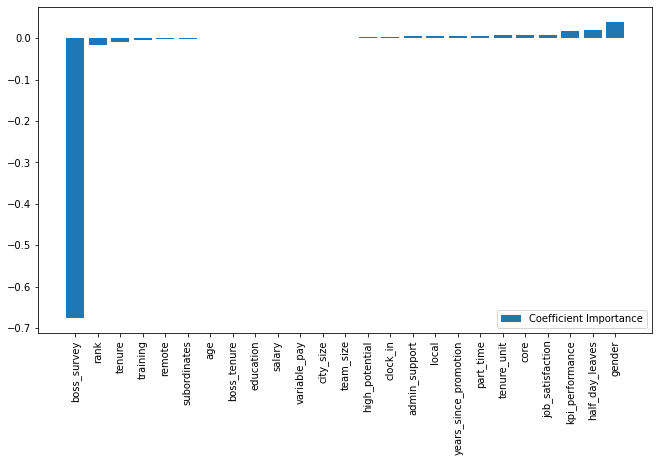

In [8]:
# uSING FUNCTIONS WE DEFINED EARLIER

# print the RMSE of each fold to check the predictive performance
printLassoRMSE(cvlasso,X,y)

# note that the plot will rearrange the variable order by coef size
plotLassoCoef(modellasso,X)

In [9]:
printLassoVariables(modellasso,X,y) # FUNCTION to see variable selected by LASSO

Selected Variables: ['boss_survey', 'gender', 'half_day_leaves', 'kpi_performance', 'rank', 'tenure', 'job_satisfaction', 'core', 'tenure_unit', 'part_time', 'years_since_promotion', 'local', 'admin_support', 'clock_in', 'training', 'remote', 'high_potential', 'subordinates']


In [11]:
print(list(zip(modellasso.coef_[abs(modellasso.coef_)>0], X))) 
# show coeff values for non 0 coefficients

[(0.005330063394740757, 'admin_support'), (-0.00029111234113633256, 'age'), (-0.6769125972022575, 'boss_survey'), (-0.00013467632419865465, 'boss_tenure'), (0.00035529291989674596, 'city_size'), (0.003414171908210019, 'clock_in'), (0.00813617107829916, 'core'), (2.1612001238977524e-05, 'education'), (0.03941238387845702, 'gender'), (0.020472982897737965, 'half_day_leaves'), (0.0022360624886201817, 'high_potential'), (0.008290831128862, 'job_satisfaction'), (0.018048028219817526, 'kpi_performance'), (0.005652558576024326, 'local'), (0.0061742825495914285, 'part_time'), (-0.015215084368156006, 'rank'), (-0.0023409777820554206, 'remote'), (0.00020414397763021945, 'salary'), (-0.0014315191847349212, 'subordinates'), (0.0004043919555713334, 'team_size'), (-0.008411538683581696, 'tenure'), (0.0072241079272052635, 'tenure_unit'), (-0.003266220982774282, 'training'), (0.00021168727567898974, 'variable_pay'), (0.005975075159316646, 'years_since_promotion')]


### NOTES
Remember that if alpha = 0, then the lasso gives the least squares fit, and when alpha becomes very large, the lasso gives the null model in which all coefficient estimates equal zero.

### Interpretation
Logistic regression returns information in log odds.
So you must first convert log odds to odds using np.exp and then take odds/(1 + odds) to get probablity.


OR = p / (1-p)

p = OR - P(OR)
p(1+OR)=OR
p=OR/(1+OR)

coeff = log(OR)


exp(Coeff)= OR

Therefore p = exp(Coeff)/(1+exp(Coeff)

see: https://stats.oarc.ucla.edu/other/mult-pkg/faq/general/faq-how-do-i-interpret-odds-ratios-in-logistic-regression/
and
https://stackoverflow.com/questions/51006193/interpreting-logistic-regression-feature-coefficient-values-in-sklearn

In [16]:
# so for boss survey , the coeff is -0.676
# => odds ratio for boss survey is np.exp(-0.676)
print("Odds of Exit change by",np.exp(-0.676),"for unit change in Boss survey")
# i.e., a change in boss survey by 1 unit changes odds ratio by ____

print("Prob. of Exit changes by", [np.exp(-0.676)/(1 + np.exp(-0.676))],"for unit change in Boss Survey")

Odds of Exit change by 0.5086475186803137 for unit change in Boss survey
Prob. of Exit changes by [0.337154645059339] for unit change in Boss Survey
